In [1]:
websites = ["Huffpost","the Washington Post","Fox News","Wall Street journal"]
websites_number = len(websites)

In [2]:
import pandas as pd

In [3]:
web_data = []
for i in range(websites_number):
    df = pd.read_excel("Data-%s.xlsx"%websites[i])
    web_data.append(df)

In [6]:
def write_to_file(data):
    with open("text.txt",'a+') as f:
        f.write(data)

In [9]:
for df in web_data:
    for art in df.content:    
        write_to_file(art)
    for art_t in df.title:
        write_to_file(art_t)

[('wa', 3197), ('hi', 1907), ('Hong Kong', 1339), ('the president', 1270), ('going to', 1269), ('the United', 1191), ('United State', 1118), ('Trump', 879), ('report', 801), ('the Chinese', 780), ('the world', 779), ('White House', 776), ('now', 754), ('according to', 713), ('the coronavirus', 711), ('people', 692), ('President Trump', 682), ('the country', 671), ('one of', 642), ('want to', 640), ('one', 635), ('the virus', 607), ('the pandemic', 593), ('will be', 583), ('you know', 568), ('VIDEO CLIP', 563), ('Biden', 553), ('the Trump', 546), ('Joe Biden', 535), ('he said', 529), ('the new', 524), ('the first', 523), ('New York', 519), ('national security', 507), ('including', 501), ('the White', 492), ('say', 476), ('said the', 455), ('Trump administration', 440), ('Beijing', 425), ('political', 419), ('the state', 411), ('Republican', 404), ('government', 402), ('doe', 402), ('another', 392), ('even', 385), ('the company', 381), ('Fox New', 379), ('to make', 377)]


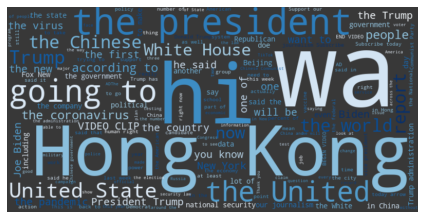

In [19]:
import os
from os import path
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from matplotlib import pyplot as plt
# 获取文本text
text = open('text.txt').read()


# 获取文本词排序，可调整 stopwords
process_word = WordCloud.process_text(wc,text)
sort = sorted(process_word.items(),key=lambda e:e[1],reverse=True)
print(sort[:50]) # 获取文本词频最高的前50个词
# # 结果
# [('one', 60), ('ship', 47), ('Nineteen Hundred', 43), ('know', 38), ('music', 36), ...]

stopwords = set(STOPWORDS)
stopwords.add('wa')


# 生成词云
wc = WordCloud(
    scale=2,# 缩放2倍
    max_font_size = 100,
    background_color = '#383838',# 灰色
    colormap = 'Blues') 

wc.generate_from_text(text)
# 显示图像
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
#存储图像
wc.to_file('1900_basic.png')
# or
# plt.savefig('1900_basic.png',dpi=200)
plt.show()

In [34]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
        return "hsl(0, 0%%, %d%%)" % random.randint(50, 100)
# 随机设置hsl色值


In [37]:
import os
from os import path
import numpy as np
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from PIL import Image
from matplotlib import pyplot as plt
import random

def wc_english():
    # 获取当前文件路径
    d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
    # 获取文本text
    text = open(path.join(d,'text.txt')).read()
    # 读取背景图片
    background_Image = np.array(Image.open(path.join(d, "mask1900.jpg")))
    # or
    # background_Image = imread(path.join(d, "mask1900.jpg"))
    # 提取背景图片颜色
    img_colors = ImageColorGenerator(background_Image)
    # 设置英文停止词
    stopwords = set(STOPWORDS)
    stopwords.add('wa')
    stopwords.add('hi')
    stopwords.add('going')
    stopwords.add('to')
    stopwords.add('said')
    stopwords.add('now')
    wc = WordCloud(
        margin = 2, # 设置页面边缘
        mask = background_Image,
        scale = 2,
        max_words = 200, # 最多词个数
        min_font_size = 4, # 最小字体大小
        stopwords = stopwords,
        random_state = 42,
        background_color = 'black', # 背景颜色
        max_font_size = 150, # 最大字体大小
        )
    # 生成词云
    wc.generate_from_text(text)
    # 根据图片色设置背景色
#     wc.recolor(color_func=img_colors)
    wc.recolor(color_func=grey_color_func)
    #存储图像
    wc.to_file('1900pro1.png')
    # 显示图像
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

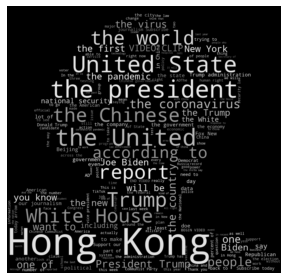

In [38]:
wc_english()